# Crregando e organizando dados no Pandas

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ratings.csv')
df.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [3]:
df.columns = ["id_usuario","id_filme","nota","momento"] 

In [4]:
df.shape

(100836, 4)

In [5]:
df = df.drop(columns=["momento"], axis=1)
df.head()

,id_usuario,id_filme,nota
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


# Analisando dados importados

Analisando quais são os valores possíveis de notas e outras informações a cerca da mesma. 

In [6]:
df.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
df.nota.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [8]:
print("Media",df.nota.mean())
print("Mediana",df.nota.median())

Media 3.501556983616962
Mediana 3.5


In [9]:
df.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Analise gráfica das notas.

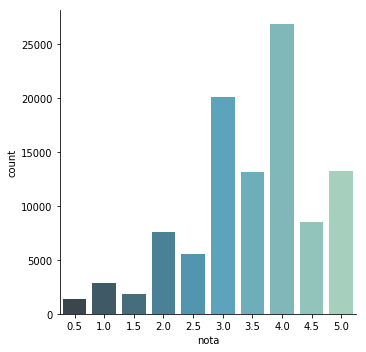

In [11]:
import seaborn as sns

sns.catplot(x = "nota", kind="count",palette="GnBu_d", data = df)

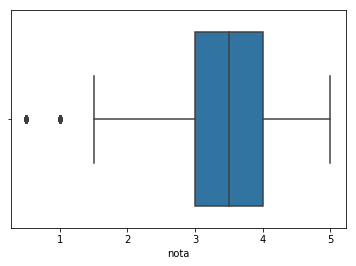

In [12]:
sns.boxplot(df.nota)

# Carregando informações dos filmes e adicionando usuario para obter recomendações 

In [13]:
movie_titles = pd.read_csv('movies.csv')
movie_titles.columns= ['id_filme', 'titulo','genero']
movie_titles.head()

,id_filme,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Adicionando usuario teste

In [14]:
df["id_usuario"].max()

610

In [15]:
lista_ismenia = [[611,3994,3.0],[611,77846,4.0],[611,48780,5.0],[611,4995,5.0],[611,1246,4.0],
                 [611,140174,5.0],[611,356,5],[611,58047,4],[611,5791,4],[611,33145,5],[611,88405,4],
                 [611,7254,4.0],[611,2706,2.0],[611,69406, 4.0],[611,115667,4.0],[611,1721,5.0],[611,8529,5]]
df_ism = pd.DataFrame(data=lista_ismenia, columns=['id_usuario','id_filme','nota'])
df_ism.head()

,id_usuario,id_filme,nota
0,611,3994,3.0
1,611,77846,4.0
2,611,48780,5.0
3,611,4995,5.0
4,611,1246,4.0


In [16]:
df = pd.concat([df,df_ism])
df.tail(20)

,id_usuario,id_filme,nota
100833,610,168250,5.0
100834,610,168252,5.0
100835,610,170875,3.0
0,611,3994,3.0
1,611,77846,4.0
2,611,48780,5.0
3,611,4995,5.0
4,611,1246,4.0
5,611,140174,5.0
6,611,356,5.0


Adicionando as informações dos filmes oa df.

In [17]:
df = pd.merge(df, movie_titles, on='id_filme')
df.sort_values('id_usuario').tail(20)

,id_usuario,id_filme,nota,titulo,genero
89768,610,120635,1.0,Taken 3 (2015),Action|Crime|Thriller
31649,610,377,5.0,Speed (1994),Action|Romance|Thriller
98430,610,3973,2.5,Book of Shadows: Blair Witch 2 (2000),Crime|Horror|Mystery|Thriller
78283,611,140174,5.0,Room (2015),Drama
35202,611,3994,3.0,Unbreakable (2000),Drama|Sci-Fi
36253,611,4995,5.0,"Beautiful Mind, A (2001)",Drama|Romance
99891,611,115667,4.0,"Love, Rosie (2014)",Comedy|Romance
92286,611,77846,4.0,12 Angry Men (1997),Crime|Drama
70667,611,5791,4.0,Frida (2002),Drama|Romance
42174,611,58047,4.0,"Definitely, Maybe (2008)",Comedy|Drama|Romance


# Método SVD (Mesmo do netflix)

A biblioteca que foi desenvolvido esse modelo é a Surprise (https://surprise.readthedocs.io/en/stable/index.html# ). Nela há vários modelos ultilizaveis, inclusive o SVD.

Primeiramente será feito um grid search para obter melhotes parâmetros para o método.

In [18]:
from surprise.model_selection import RandomizedSearchCV
from surprise import KNNBasic #Outro metodo
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split
import random
import time

tic = time.time()

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

reader = Reader(rating_scale=(0.5,5)) #Definindo o range das notas
data = Dataset.load_from_df(df[['id_usuario','id_filme','nota']], reader) #Carregando o DataFrame
trainset = data.build_full_trainset() #Treinando com todo o dataset, para poder recomendar o que está faltando

param_grid = {'n_epochs': [i for i in range(39,81)], 'lr_all': [0.002,0.003,0.004, 0.005,0.01],
              'reg_all': [0.1,0.2,0.4, 0.6,0.8], 'init_std_dev':[0.05,0.1,0.2,0.3]}

gs = RandomizedSearchCV(SVD,param_grid,n_iter=35,n_jobs=-1, measures=['rmse', 'mae'], cv=5)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])  

tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

0.8486812376094633
{'n_epochs': 74, 'lr_all': 0.01, 'reg_all': 0.1, 'init_std_dev': 0.1, 'init_mean': 0}
Tempo 1996.30 segundos


Ultilizando o método para obter recomendações. 

In [19]:
def MetodoSVD(Usuario):

    SEED = 42
    random.seed(SEED)
    np.random.seed(SEED)

    reader = Reader(rating_scale=(0.5,5)) #Definindo o range das notas
    data = Dataset.load_from_df(df[['id_usuario','id_filme','nota']], reader) #Carregando o DataFrame
    trainset = data.build_full_trainset() #Treinando com todo o dataset, para poder recomendar o que está faltando

    #Parametros para o método
    
    pred_algo = SVD(n_epochs=76,init_std_dev=0.1,lr_all=0.01,reg_all=0.1)
    pred_algo.fit(trainset)
    
    #Metodo para avaliar cada item(filme) da lista
    recomendados= list() #lista onde terão os mais recomendados 
    filmes_fora = list() #lista onde teram os os cursos que o usuario gostou e não entrarão no algoritimo

    for key,item in df.iterrows():
        usuario = item['id_usuario']
        if usuario == Usuario:
            filmes_fora.append(item['id_filme'])
    
    for key,item in df.iterrows():
        if item['id_filme'] not in filmes_fora:
            recomendados.append(pred_algo.predict(Usuario, item['id_filme']))
            filmes_fora.append(item['id_filme'])
            
    tabela_recomendacoes = pd.DataFrame(recomendados)
    tabela_recomendacoes = tabela_recomendacoes.sort_values('est', ascending=False)
    
    # adicionando informações para a tabela de recomendações
    tabela_recomendacoes = tabela_recomendacoes.rename(columns={'iid': 'id_filme'})
    tabela_recomendacoes = pd.merge(tabela_recomendacoes, movie_titles, on='id_filme')
    
    return tabela_recomendacoes

In [20]:
tic = time.time()
recomendacoes = MetodoSVD(611)
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

recomendacoes = recomendacoes.drop(columns=["r_ui"], axis=1)
recomendacoes.head(25)

Tempo 67.04 segundos


,uid,id_filme,est,details,titulo,genero
0,611,6442,5.000000,{'was_impossible': False},Belle époque (1992),Comedy|Romance
1,611,171495,5.000000,{'was_impossible': False},Cosmos,(no genres listed)
2,611,26810,5.000000,{'was_impossible': False},Bad Boy Bubby (1993),Drama
3,611,3451,5.000000,{'was_impossible': False},Guess Who's Coming to Dinner (1967),Drama
4,611,5490,5.000000,{'was_impossible': False},The Big Bus (1976),Action|Comedy
5,611,6460,5.000000,{'was_impossible': False},"Trial, The (Procès, Le) (1962)",Drama
6,611,132333,5.000000,{'was_impossible': False},Seve (2014),Documentary|Drama
7,611,5328,5.000000,{'was_impossible': False},Rain (2001),Drama|Romance
8,611,3379,5.000000,{'was_impossible': False},On the Beach (1959),Drama
9,611,177593,5.000000,{'was_impossible': False},"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama


# Validação do modelo de recomendação

In [21]:
def ValidacaoModelo(numero_splits):
    
    
    reader = Reader(rating_scale=(0.5,5))
    data = Dataset.load_from_df(df[['id_usuario','id_filme','nota']], reader)
    pred_algo = SVD(n_epochs=76,init_std_dev=0.1,lr_all=0.01,reg_all=0.1)
    
    
    trainset = data.build_full_trainset()
    kf = KFold(n_splits=numero_splits)
    acuracia = list()

    for trainset, testset in kf.split(data):

        # train and test algorithm.
        pred_algo.fit(trainset)
        predictions = pred_algo.test(testset)

        # Compute and print Root Mean Squared Error
        acuracia.append(accuracy.rmse(predictions, verbose=False))
    
    acuracia = pd.DataFrame(acuracia)
    return acuracia

In [22]:
tic = time.time()
acuracia = ValidacaoModelo(5)
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

print("Erro de %.2f na nota" % acuracia.mean())

Tempo 175.70 segundos
Erro de 0.85 na nota
